In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

from src.RGBcubical_utils import compute_RGB_contributions, difference_RGB_ECP

from tqdm.notebook import tqdm

# load images

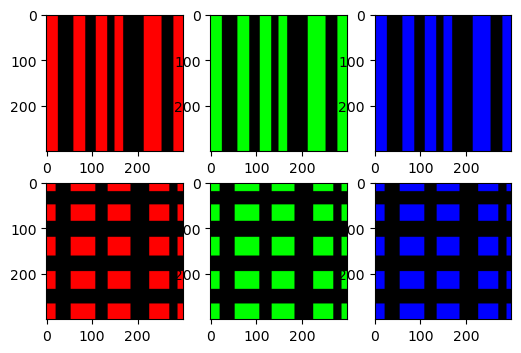

In [5]:
images = []

for i in range(1,4):
    images.append(Image.open("data/textures/banded/banded_{}.png".format(i)))

for i in range(1,4):
    images.append(Image.open("data/textures/chessboard/chessboard_{}.png".format(i)))
    
np_images = [np.int16(img) for img in images]

fig, axs = plt.subplots(2, 3, figsize=(6, 4))

for i in range(3):
    axs[0, i].imshow(np_images[i])
    axs[1, i].imshow(np_images[i+3])

plt.show()

In [6]:
def add_noise(input_matrix, noise_min = -25, noise_max = +25, p = 0.1, seed=42):
    
    np.random.seed(seed)

    noise_matrix = np.random.randint(low=noise_min, high=noise_max, 
                                     size=input_matrix.shape, dtype=int)
    
    # we want to add noise only to p fraction of pixels
    sampling_matrix = np.random.uniform(low=0.0, high=1.0, size=input_matrix.shape)
    sampling_matrix[sampling_matrix <= p] = 1
    sampling_matrix[sampling_matrix < 1] = 0
    sampling_matrix = np.int16(sampling_matrix)
    
    return(np.clip( input_matrix + np.multiply(noise_matrix, sampling_matrix),
                    a_min=0, a_max=255))

In [9]:
NUM_SAMPLES = 5
noisy_images = []

for im in np_images:
    noisy_images += [add_noise(im, seed=i, noise_min=-10, noise_max=10, p=1)
                     for i in range(NUM_SAMPLES)]

print(len(noisy_images))

30


# Compute RGB Euler profiles

In [10]:
list_of_RGB_contributions = [compute_RGB_contributions(img) for img in tqdm(noisy_images)]

  0%|          | 0/30 [00:00<?, ?it/s]

# Distance matrix

In [12]:
%%time
distance_matrix_RBG = np.zeros((len(list_of_RGB_contributions), 
                                len(list_of_RGB_contributions)))

for i in range(len(list_of_RGB_contributions)):
    for j in range(i+1, len(list_of_RGB_contributions)):
        distance_matrix_RBG[i,j] = difference_RGB_ECP(list_of_RGB_contributions[i], list_of_RGB_contributions[j])
        distance_matrix_RBG[j,i] = distance_matrix_RBG[i,j]

CPU times: user 4min 25s, sys: 756 ms, total: 4min 26s
Wall time: 4min 26s


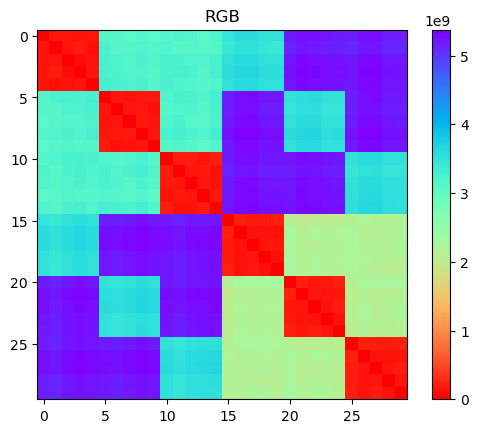

In [14]:
im0 = plt.imshow(distance_matrix_RBG, cmap='rainbow_r')
plt.colorbar(im0)
plt.title('RGB')
plt.xticks([i for i in range(0, 30, 5)])
plt.yticks([i for i in range(0, 30, 5)])
plt.show()